In [1]:
import numpy as np
import pandas as pd
import requests
import io
from scipy import optimize
import matplotlib.pyplot as plt
import requests, pandas as pd
from bs4 import BeautifulSoup
import urllib.request
import seaborn as sns
pd.set_option('display.max_rows', 600)
pd.set_option('display.max_columns', 600)

In [72]:
#https://www.centreforcities.org/data-tool/su/6d5b08f4

df = pd.read_csv(r'C:\Users\vw191\OneDrive - University of Bristol\Course\3rd year\Data Science\Project\Chart_2_UK\Centre_for_cities_full_data.csv')
df = df[:63]
df.columns = df.columns.str.replace('\\([^()]{0,}\\)','')
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace("(â£)",'')
df.columns = df.columns.str.replace(" ","")
df = df.drop(4)
df.city

0          Aberdeen
1         Aldershot
2          Barnsley
3          Basildon
5        Birkenhead
6        Birmingham
7         Blackburn
8         Blackpool
9       Bournemouth
10         Bradford
11         Brighton
12          Bristol
13          Burnley
14        Cambridge
15          Cardiff
16          Chatham
17         Coventry
18          Crawley
19            Derby
20        Doncaster
21           Dundee
22        Edinburgh
23           Exeter
24          Glasgow
25       Gloucester
26     Huddersfield
27             Hull
28          Ipswich
29            Leeds
30        Leicester
31        Liverpool
32           London
33            Luton
34       Manchester
35        Mansfield
36    Middlesbrough
37    Milton Keynes
38        Newcastle
39          Newport
40      Northampton
41          Norwich
42       Nottingham
43           Oxford
44     Peterborough
45         Plymouth
46       Portsmouth
47          Preston
48          Reading
49        Sheffield
50           Slough


In [84]:
sdf = df.loc[:,['city','averageweeklyworkplaceearnings2019','businessstart-ups2019','co2emissionspercapita2018','gdp2018','gdpperworker2018','housingaffordabilityratio2019','housingstock2019','meanhouseprice2018','ultrafastbroadband2019','privateknowledgeintensivebusinessservices2019']]
sdf[['averageweeklyworkplaceearnings2019','businessstart-ups2019','co2emissionspercapita2018','gdp2018','gdpperworker2018','housingaffordabilityratio2019','housingstock2019','meanhouseprice2018','ultrafastbroadband2019','privateknowledgeintensivebusinessservices2019']].astype(float)

#sdf['gdp2018'] = sdf['gdp2018'].astype(float)

In [91]:
for i in ['averageweeklyworkplaceearnings2019','businessstart-ups2019','co2emissionspercapita2018','gdp2018','gdpperworker2018','housingaffordabilityratio2019','housingstock2019','meanhouseprice2018','ultrafastbroadband2019','privateknowledgeintensivebusinessservices2019']:
    sdf[i] = sdf[i].astype(float)

In [92]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 62
Data columns (total 11 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   city                                           62 non-null     object 
 1   averageweeklyworkplaceearnings2019             62 non-null     float64
 2   businessstart-ups2019                          62 non-null     float64
 3   co2emissionspercapita2018                      62 non-null     float64
 4   gdp2018                                        62 non-null     float64
 5   gdpperworker2018                               62 non-null     float64
 6   housingaffordabilityratio2019                  62 non-null     float64
 7   housingstock2019                               62 non-null     float64
 8   meanhouseprice2018                             62 non-null     float64
 9   ultrafastbroadband2019                         62 non-nu

In [90]:
sdf.gdpperworker2018.astype(float)

0     66091.0
1     71278.0
2     52929.0
3     74161.0
5     57519.0
6     60695.0
7     48736.0
8     52699.0
9     60187.0
10    53571.0
11    65994.0
12    66934.0
13    67507.0
14    59751.0
15    59926.0
16    66073.0
17    63884.0
18    66063.0
19    57043.0
20    53298.0
21    52143.0
22    75134.0
23    61058.0
24    54306.0
25    55256.0
26    53463.0
27    53796.0
28    75116.0
29    60325.0
30    57523.0
31    59862.0
32    91297.0
33    80903.0
34    58070.0
35    49689.0
36    61795.0
37    84784.0
38    53474.0
39    52017.0
40    60379.0
41    57842.0
42    58064.0
43    52171.0
44    61356.0
45    55423.0
46    61453.0
47    66677.0
48    83801.0
49    53786.0
50    99988.0
51    71760.0
52    54547.0
53    61359.0
54    68795.0
55    56475.0
56    86814.0
57    61554.0
58    55226.0
59    59670.0
60    55364.0
61    81265.0
62    64384.0
Name: gdpperworker2018, dtype: float64

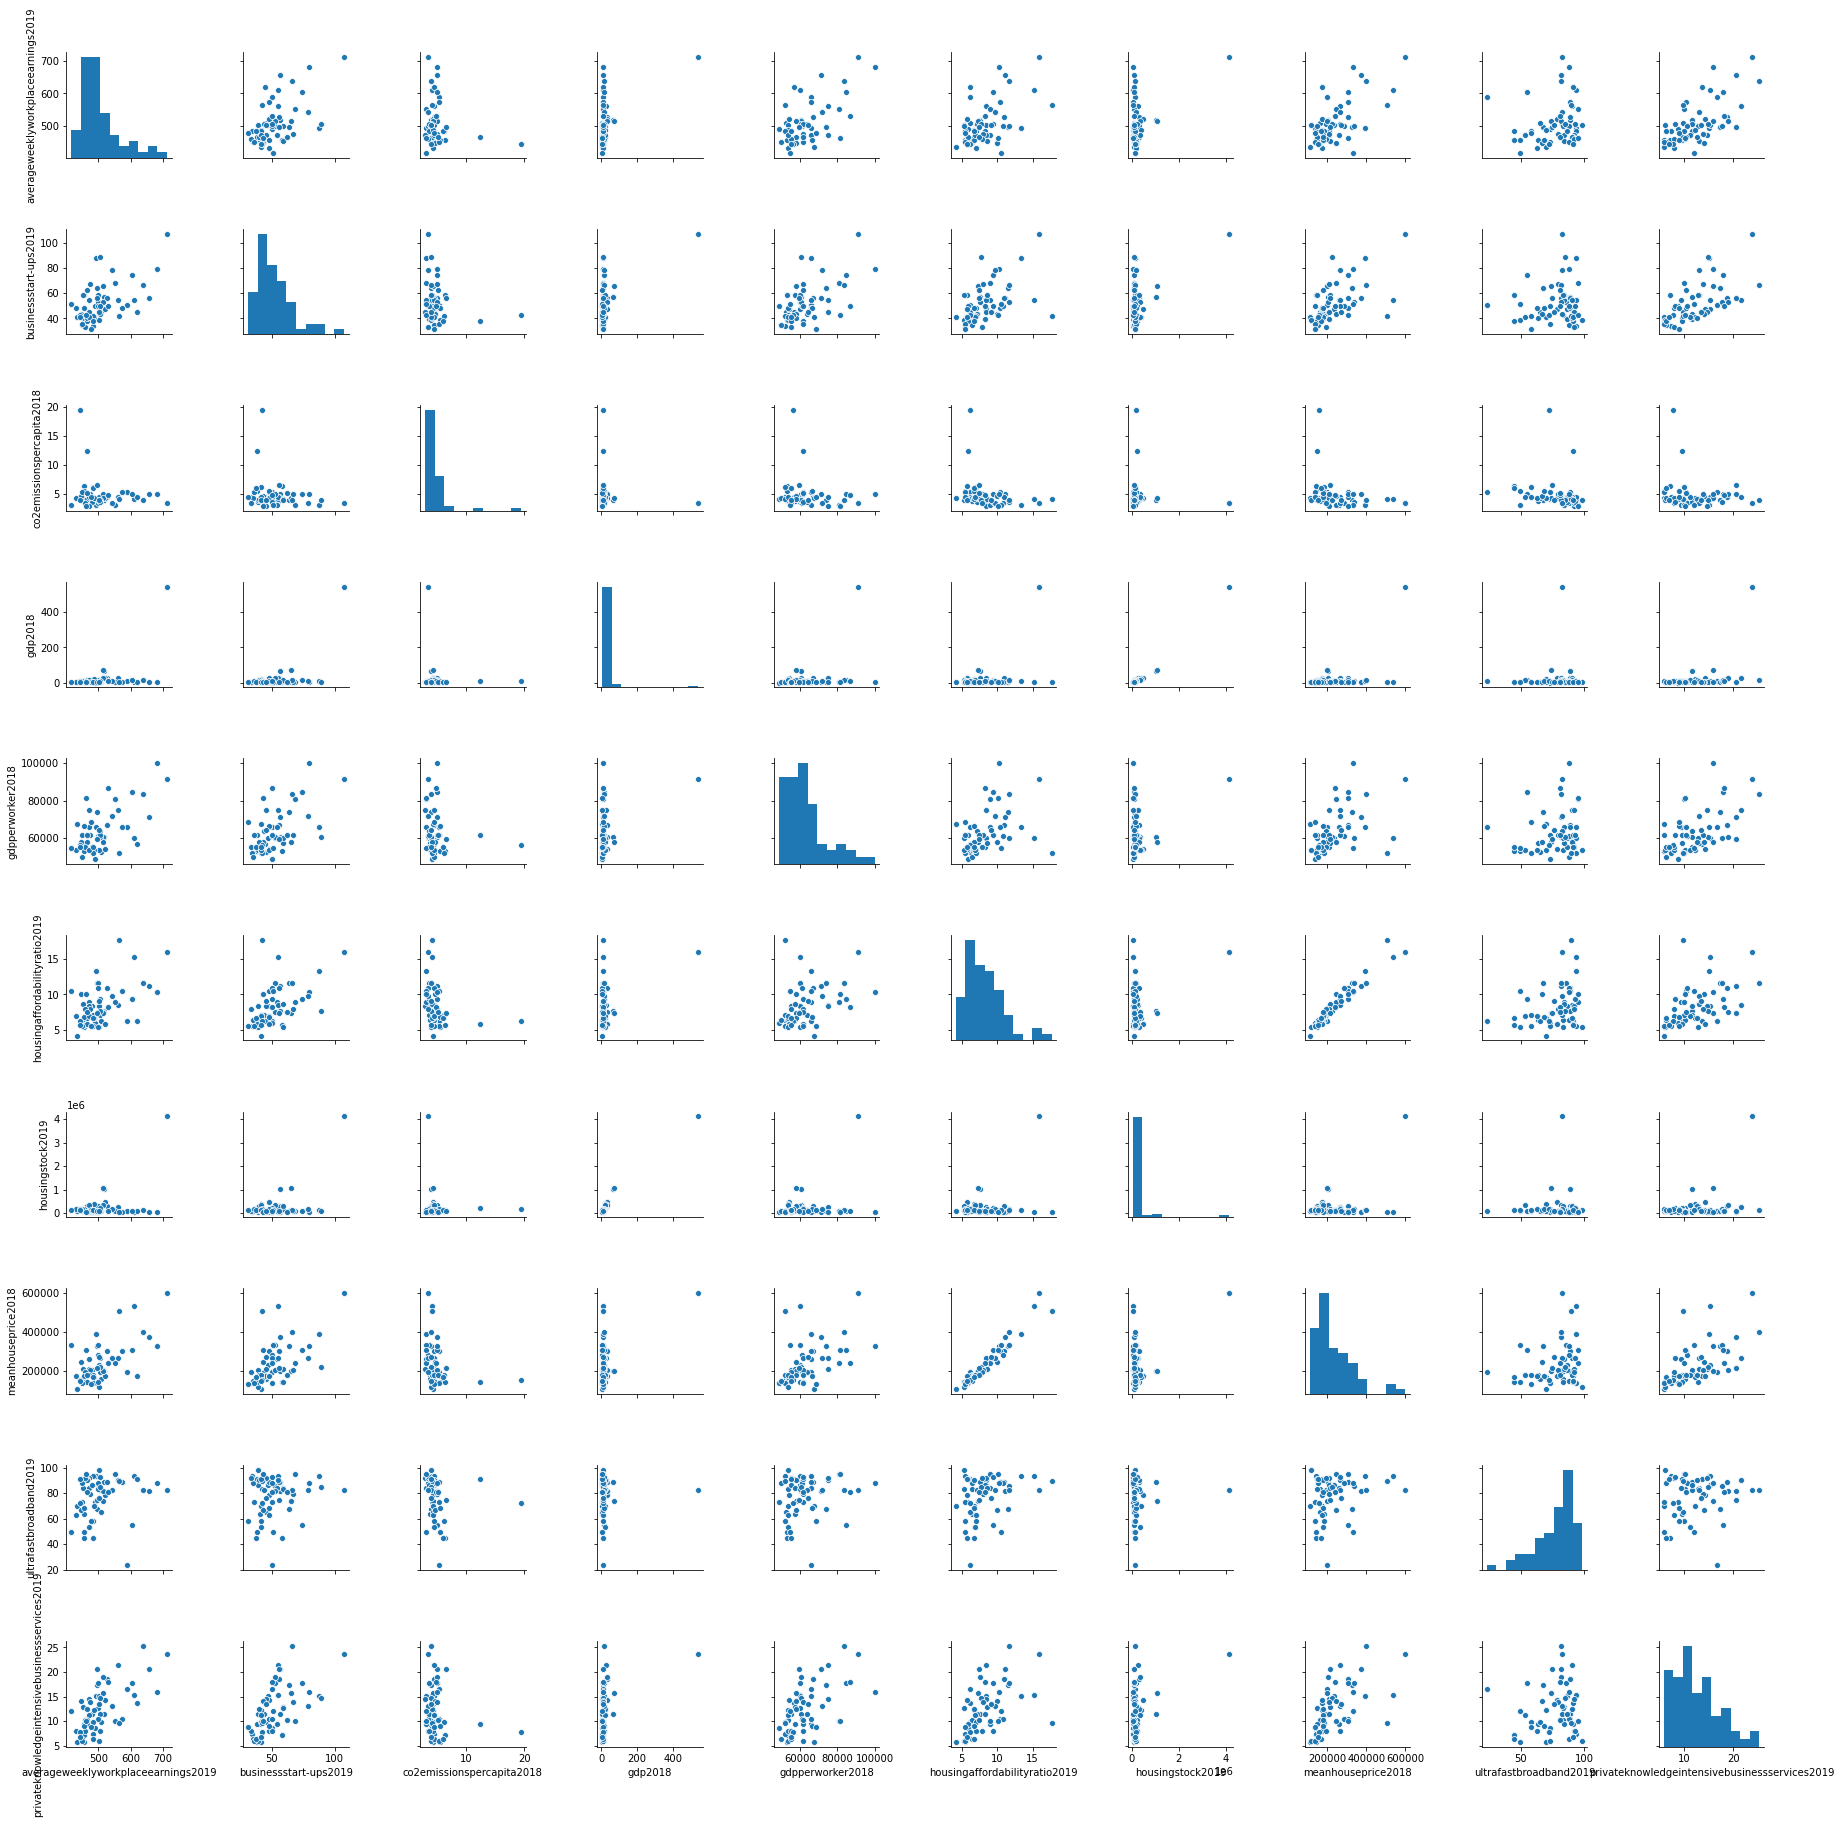

In [93]:

sns.pairplot(sdf, height=2.5)

In [85]:
sdf['gdpperworker2018'].dtype

dtype('O')